#Tülomsaş Train Traction Motor

##Ratings

- **Power :** 142-152 kW
- **Voltage :** 800-1100 V
- **Speed :** 374- 3120 rpm
- **Mass:** 1560 kg
- **Motor type:** Three phase IM

[Here](http://www.tulomsas.com.tr/main.php?kid=198&rid=101) you can find the related info about Tülomsaş's motor. 

![motor_picture](http://www.tulomsas.com.tr/upload/resim/101.jpg)



Since the phase voltages and synchronous speeds are variable, constant V/f technique can be used to keep the max. torque constant during various speeds. Thus, in this design parameters are calculated according to one voltage and frequency which are in between the limit values.

- ##Stator Core

In the below cell we defined basic characteristic operating values and selected power factor, efficiency and pole number. 

In [1]:
from math import sqrt,sin,cos,pi,tan
Pn=150e3 #Power
pf= 0.85 #Power-factor cos(phi) from Fig. 16.1
eff = 0.93 #targeted efficiency
n_s=1250 #synchronous speed
Vll=950 #Line voltage for Y connection
Vph = Vll/sqrt(3) #phase voltage
m=3 #number of phase
freq=50 #supply frequency
poles=(120*freq)/n_s #number of poles
pp=poles/2 #number of pole pairs
ke= 0.98-0.005*pp #from eq. 15.1
print poles
print ke
print Vph

4
0.97
548.48275573


**Number of poles** is calculated as $4$

Now we calculate air-gap apparent power and stator bore diameter with respect to predefined coefficients.     

In [2]:
Sgap=ke*Pn/(eff*pf) #Apparent airgap power 
print Sgap
C_0=235e3 # Esson's constant (J/m^3) from fig. 14.14
lmbd=1.6 # Stack aspect ratio from table 15.1
Dis=((2*poles*pp*Sgap)/(pi*lmbd*freq*C_0))**(1/3.0) #stator bore diameter
print Dis

184060.721063
0.368064947789


**Apparent airgap power** is calculated as $184.06 kVA$ 

Therefore **stator bore diameter** is obtained as $0.368  m$

**Slot pitch** is calculated as $0.025 m$

In [3]:
tau=pi*Dis/(2*pp) #pole pitch
L=lmbd*tau #stack lenght
q=4 #slots per pole per phase value(larger q gives better performance-smaller space field harmonics and losses)
tau_s=tau/(m*q) #stator slot pitch 
print tau
print L
print tau_s

0.289077534005
0.462524054407
0.0240897945004


Outer stator diameter is calculated according to inner/outer diameter ratios given in the Ion Boldea's [book](http://www.amazon.ca/The-Induction-Machine-Handbook-Boldea/dp/0849300045)

Also air-gap is calculated

In [4]:
import math
K_D= 0.62 #selected from table 15.2 for 4 poles
Dout=Dis/K_D #external stator diameter
print Dout
g=(0.1+0.012*math.pow(Pn,1.0/3.0))*1e-3 #air-gap 
print g

0.593653141596
0.00073759514151


**Outer diameter** is calculated as $0.59 \ m$

**air-gap** value for pole number $\geq 2$ is calculated by using eq.15.5


- ##Stator Winding

In [5]:
Ns=2*pp*q*m #Number of stotor slots
print Ns


48


Two-layer winding with chorded coils, y/$\tau$=7/9 is chosen as 7/9=0.77 is close to 0.8, which would reduce the first (5$^{th}$ order) stator mmf space harmonic.

In [6]:
alpha_e=(2*pi*pp)/Ns
print alpha_e

0.261799387799


Electrical angle between emfs in neighboring slots is shown above cell by *alpha_e* 

it equals to:

##$\alpha_{ec} = \frac{2*\pi*p1}{N_{s}}= \frac{2\pi2}{48} = \frac{\pi}{12}$


Stator winding factor calculation :

In [7]:
K_q1=sin(q*alpha_e/2.0)/(q*sin(alpha_e/2.0)) #distribution factor or zone factor from eq. 15.8
print K_q1
K_y1=sin(pi/2.0*7/9) #pitch factor or chording factor from eq. 15.9
print K_y1
K_w1=K_q1*K_y1 # stator winding factor
print K_w1

0.957662196943
0.939692620786
0.899908099673


$B_{g}=0.68 \ sample \ air \ gap \ flux \ density \ selected \ from \ eq. \ 15.11$

Pole spanning coefficient $\alpha_{i}$ depends on the tooth saturation factor $1+K_{st}$

Now we can consider $1+K_{st}=1.4$, with {alpha_i=0.729} $K_{f}=1.085$

$$Pole flux= \phi =\alpha_{i}*\tau*L*B_{g}$$

In [8]:
B_g=0.68
alpha_i=0.729 # Pole spanning coefficient, Fig. 14.13
flux_pole=alpha_i*tau*L*B_g #flux per pole from eq. 15.10
print flux_pole

0.066280397793


In [9]:
K_f=1.085
W_1=ke*Vph/(4*K_f*K_w1*freq*flux_pole) # Number of turns per phase from eq. 15.12 
print W_1

41.1047216261


####The number of conductor paths in parallel is defined as:
$$n_{s}= \frac{a_{1}*W_{1}}{p1*q}$$




In [10]:
a1=1
ns=a1*W_1/(pp*q) # Number of conductors per slot
print ns

5.13809020327


In [11]:
ns=6 #ns should be an even number because there are two distinct coils per slot in a double layer winding
W_1=pp*q*ns #recalculate the actual number of turns per phase
print W_1

48


In [12]:
B_g=B_g*41.1/48 #recalculate the actual air-gap flux density
print B_g

0.58225


Wire cross-section and diameter are calculated by using rated current and selected current density below:

In [13]:
I_ln=Pn/(sqrt(3)*Vll*pf*eff) #rated current(Iln) from eq. 15.16
print I_ln
J_cos=6 #current density value selected from eq. 15.17
A_co=I_ln/(J_cos*a1) #magnetic wire cross section in mm^2 (eq. 15.18)
print A_co
d_co=sqrt(4*A_co/pi)
print d_co

115.320137659
19.2200229432
4.94688722956


Since $d_{co}$ value is bigger than 1.3 mm, choose $a_{p}=2$

In [14]:
ap=2 #number of conductors in parallel
d_co=sqrt(4*A_co/pi*ap) 
print d_co

6.99595501157


In order to meet the requirements we selected **AWG1** wire which has diameter of $7.348 \ mm$ 

**Magnetic** and **electrical** loading values:

In [22]:
E_load=m*2*W_1*I_ln/(pi*Dis*L) #electrical loading (A/m^2)
print E_load
M_load=(flux_pole*2*pp)/(pi*Dis*L) #magnetic loading (T or Wb/m^2)
print M_load

62099.6258193
0.49572


- ##Stator Slot Sizing

In [23]:
K_fill=0.44 #fill factor for round-type wire
A_useful=pi*(d_co**2)*ap*ns/(4*K_fill) 
print A_useful


1048.36488781


We choose **rectangular shape** for the stator slots among the recommended geometries

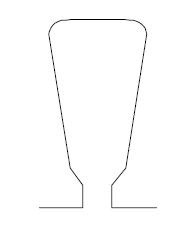

In [24]:
from IPython.display import Image
Image(filename='rectangular.png')

$Rectangular \ stator \ slot \ shape$

Also we assume that all flux passes through the stator teeth. Therefore:

$$B_{g}* \tau_{s}*L = B_{ts}*b_{ts}*L*K_{Fe} $$

In [25]:
Kfe=0.96 #taking lamination insulation thickness into account 
B_ts=1.55 #tooth flux density determined from 1.5-1.65T range
b_ts=B_g*tau_s*L/(B_ts*L*Kfe) #stator tooth width 
print b_ts
b_os=2.2e-3 #shown detailed in fig. 15.5
h_os=1e-3 #shown detailed in fig. 15.5
h_w=1.5e-3 #shown detailed in fig. 15.5
b_s1=pi*(Dis+2*h_os+2*h_w)/Ns-b_ts #lower slot width in (m) 
print b_s1

0.00942626535474
0.0149907783804


From the selected geometry,useful area $A_{su}$ can be defined as follows:
$$A_{su}=h_{s}\frac{(b_{s1}+b_{s2})}{2}$$

In [30]:
b_s2=sqrt(4*A_useful*1e-6*tan(pi/Ns)+b_s1**2) #upper slot width in (m)
print b_s2
hs=2*A_useful*1e-6/(b_s1+b_s2) #Slot useful height in (m)
print hs
H_ts=1760 #magnetic field intensity for previosly selected B_ts=1.55 T (adopted from the table 15.4)
F_mts=H_ts*(hs+h_os+h_w) #stator tooth mmf 
print F_mts
F_mg=1.2*g*B_g/(4*pi*1e-7) #air-gap mmf 
print F_mg

0.0223512258414
0.0561493636807
103.222880078
507.133063174


Here,these calculated values above are last version of updating Bg=0.72 in order to satisfy required condition.

In order to support calculated geometric values with visual content, *Figure 15.5* given below:

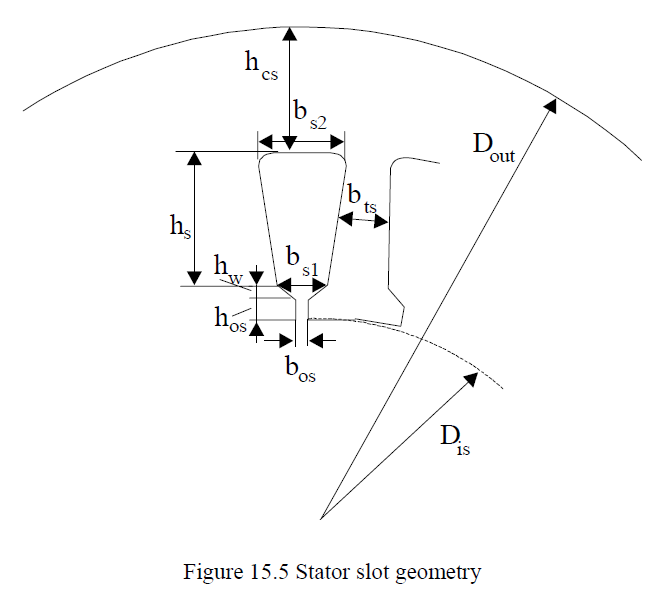

In [27]:
from IPython.display import Image
Image(filename='slot_geo.png')

In [31]:
K_st=1.4-1.0 
F_mtr=K_st*F_mg-F_mts #rotor tooth mmf 
print F_mtr

99.6303451916


We increased the $B_{g}$ value to $0.72 \ T$  to satisfy the condition:

$$F_{mtr} \approx F_{mts}$$

final values:

$F_{mts}=103.22 \quad A-t$

$F_{mtr}=99.63 \quad A-t$

In [29]:
B_g=0.72

In [35]:
h_cs=(Dout-(Dis+2*(h_os+h_w+hs)))/2 #stator back iron height 
print h_cs
B_cs=flux_pole/(2*L*h_cs) #back core flux density 
print B_cs

0.0541447332224
1.32331906197


Our calculated **Back-core flux density**$\approx$ 1.32 T------>**this can be considered as reasonable value** 

- ##Rotor Construction

####To avoid parasitic torque, additional losses, radial forces, noise, and vibration care must be exercised in choosing the correspondence between the stator and rotor number of slots. Therefore we choose stator/rotor slot combinations according to Table 15.5 : 
$$N_{s}=48$$
$$N_{r}=36$$
Figure 15.6c is adopted for the rotor slot shape

In [25]:
Nr=36 #rotor slot is selected from table 15.5
K1=0.8*cos(flux_pole)+0.2 
I_b=K1*(2.0*m*W_1*K_w1)/Nr*I_ln # rated rotor bar current in A
print I_b

828.761848274


In [26]:
Jb=4 #current density in the rotor bar (A/mm^2)
A_b=I_b/(Jb*10**6) #rotor slot area (m^2)
print A_b

0.000207190462069


In [27]:
I_endr=I_b/(2*sin(pi*pp/Nr)) # End ring current (A)
print I_endr
Jcr=0.8*Jb  #end ring current density in (A/mm^2)
A_cr=I_endr/(Jcr*10**6) #end ring cross section area in (m^2)
print A_cr
h_or=0.5e-3 #determined from fig. 15.7
b_or=1.5e-3 #determined from fig. 15.7
tau_r=pi*(Dis-2*g)/Nr #rotor slot pitch 
print tau_r

2386.3246347
0.000745726448343
0.0319909913629


In [28]:
B_tr=1.60 # rotor tooth flux density
b_tr=B_g/(Kfe*B_tr)*tau_r #tooth width of rotor in (m)
print b_tr


0.0149957772013


Rotor diameter is:
$$D_{re}=D_{is}-2g$$

In [29]:
D_re=Dis-2*g # Rotor diameter (m)
print D_re
d1=(pi*(D_re-2*h_or)-Nr*b_tr)/(pi+Nr) #d1 diameter from fig. 15.7
print d1

0.366589757506
0.0155508776188


Diameter $d_{1}$ is calculated above.
Now we have two different equations between $d_{1}$ and $d_{2}$ : 

$$A_{b}=\frac{\pi}{8}(d_{1}^2+d_{2}^2)+\frac{(d_{1}+d_{2})h_{r}}{2} \quad \quad \quad \quad ...(15.43)$$

$$d_{1}-d_{2}=2h_{r}tan(\frac{\pi}{N_{r}})\quad \quad \quad \quad \quad  \quad \quad \quad ...(15.44)$$

If solve these two equations $d_{2}$ becomes:

$$d_{2}=\sqrt(\frac{8A_{b}tan(\frac{\pi}{N_{r}})-\pi tan(\frac{\pi}{N_{r}})d_{1}^2}{\pi tan(\frac{\pi}{N_{r}})-2})$$

and $h_{r}$ : 

$$h_{r}=\frac{(d_{1}-d_{2})}{2tan(\frac{\pi}{N_{r}})}$$

In [30]:
d2=sqrt((8*tan(pi/Nr)*A_b-pi*tan(pi/Nr)*(d1**2)/(pi*tan(pi/Nr)-2))) #d2 diameter from fig. 15.7
print d2 
hr=(d1-d2)/(2*tan(pi/Nr)) #slot height of rotor in (m)
print hr

0.0135478167321
0.0114475453501


Verifying the rotor teeth mmf $F_{mtr}$

In [31]:
H_tr=2460 #magnetic field intensity for previosly selected B_ts=1.60 T (adopted from the table 15.4)
F_mtr=H_tr*(hr+h_or+(d1+d2)/2) #rotor teeth mmf in (Ampere-Turn)
print F_mtr
B_cr=1.65 #rotor back core flux density selected from 1.4-1.7 T range
h_cr=(flux_pole/2*L*B_cr) #back core height of rotor  in (m)
print h_cr
D_shaftmax=Dis-2*g-2*(h_or+(d1+d2)/2+hr+h_cr) # Maximum diameter shaft in (m)
print D_shaftmax

65.182355613
0.0252914296099
0.263013113235


In general, from the geometry shown in fig.15.8

$$D_{re}-D_{cr}=(3-4)10^-3 \quad m$$

$$b=(1.0-1.2)(h_{r}+h_{or}+\frac{(b_{1}+b_{2})}{2})$$

In [32]:
b=1.1*(hr+h_or+(d1+d2)/2) #from the geometry shown in fig.15.8 (m)
print b
a=A_cr/b # from the geometry shown in fig.15.8 (m)
print a

0.0291465817782
0.0255853826709


- ##Magnetization Current 

####Calculation of Carter's coefficient:

In [33]:
y_1=(b_os**2)/(5*g+b_os) 
print y_1
K_c1=tau_s/(tau_s-y_1) 
print K_c1
y_2=(b_or**2)/(5*g+b_or) 
print y_2
K_c2=tau_r/(tau_r-y_2) 
print K_c2
Kc=K_c1*K_c2 #total Carter's coefficient
print Kc

0.000822014260996
1.03532843497
0.000433695168759
1.0137431029
1.04955706018


In [34]:
H_cs=482 #stator back core flux intensity is adopted from the table 15.4 according to calculated Bcs of 1.32 T
H_cr=3460 #rotor back core flux intensity is adopted from the table 15.4 according to calculated Bcr of 1.65 T
Ccs=0.88*2.71**(-0.4*B_cs**2)
Ccr=0.88*2.71**(-0.4*B_cr**2)
F_mcs=(Ccs*pi*H_cs*B_cs*(Dout-h_cs))/(2*pp)  #stator back core mmf in (AT)
F_mcr=(Ccr*pi*H_cr*B_cr*(D_shaftmax+h_cr))/(2*pp) #rotor back core mmf in (AT)
print F_mcs
print F_mcr

118.304337043
384.132032713


####Magnetization mmf $F_{lm}$ is

$$F_{lm}=2(K_{c}g \frac{B_{g}}{\mu_{0}}+F_{mts}+F_{mtr}+F_{mcs}+F_{mcr})$$

In [35]:
F_1m=2*((Kc*g*B_g)/(4*pi*(10**-7))+F_mts+F_mtr+F_mcs+F_mcr) #magnetization mmf (AT), Eq. 15.52
print F_1m

2228.79168907


In [36]:
K_s=F_1m/(2*F_mg)-1.0 #total saturation factor from eq.15.61
print K_s

1.19744269395


**Magnetization current** is given by a formula as follows:

$$I_{\mu}=\frac{\pi p1(F_{lm}/2)}{3\sqrt2 W_{1}K_{w1}}$$

In [37]:
I_mag=(pi*pp*(F_1m/2))/(3*sqrt(2)*W_1*K_w1) #magnetization current in (A) from eq. 15.62
print I_mag
I_pu=I_mag/I_ln #Per-unit value of magnetization current from eq. 15.62'
print I_pu

38.2070671519
0.331313055356


- ##Resistance and Inductance parameters calculation

Resistances and inductances values that has been calculated here refer to the equivalent circuit (*Figure 15.9*) 

Stator phase resistance:
$$R_{s}=\rho_{Co}\frac{l_{c}W_{1}}{A_{co}a_{1}}$$

where

$l_{c}=2(L+l_{end})     \quad (coil \ length)$

Generally, end connection lenght depends on the coil span y, number of poles, shape of coils and number of layers in the winding. Thus, we choose our **end connection length** formula according to number of poles as follows:

$$l_{end}=2y+-0.02 \ m \ for \ 2p_{1}=4 \ poles $$



In [38]:
y=(7.0/9.0)*tau #coil span value with 7/9 chording configuration
l_end=2*y-0.02 #calculating end connection length in (m)
l_c=2*(L+l_end) #calculating coil length in (m)
print l_end
rhoc20=1.78e-8 #resistivity of copper at 20 *C in (ohm.m)
rhoc80=rhoc20*(1+1/273*(80-20)) #resistivity of copper at 80 *C in (ohm.m) 
R_s=rhoc80*l_c*W_1/(A_co*1e-6*a1) # Stator phase resistance (ohm), Eq. 15.63
print R_s

0.429676164007
0.0793230964258


In [39]:
from math import sinh,cosh
rhoa20=3.1e-8 #aluminium resistivity at 20 *C in (ohm.m)
rhoa80=rhoa20*(1+1/273*(80-20)) #aluminium resistivity at 80 *C in (ohm.m)
D_cr=D_re-3.5e-3 #end ring diameter
l_cr=pi*(D_cr-b)/Nr #end ring part length (m)
s=1
beta_s=sqrt(2*pi*freq*(4*pi*1e-7)/(2*rhoa20)) # unit for this value is (m^-1)
ksi=beta_s*hr*sqrt(s) 
K_R=ksi*(sinh(2*ksi)+sin(2*ksi))/(cosh(2*ksi)-cos(2*ksi)) #skin effect resistance coefficient 
R_bc=rhoa80*(L/A_b*K_R+l_cr/(2*A_cr*(sin(pi*pp/Nr))**2)) #rotor bar/end ring segment equivalent resistance 
print R_bc

9.34636260446e-05


In [40]:
R_rprime=4.0*m/Nr*((W_1*K_w1)**2)*R_bc #rotor cage resistance reduced to the stator from eq. 15.74
print R_rprime
beta=7.0/9.0 # y/tau
lambda_s=(2.0/3.0*hs/(b_s1+b_s2)+2*h_w/(b_os+b_s1)+h_os/b_os)*((1+3*beta)/4) #slot connection coefficient for stator
C_s=1.0-0.033*(b_os**2)/(g*tau_s)
phi_1=pi*(6*beta-5.5) 
gama_ds=(0.14*sin(phi_1)+0.76)*1e-2 #chosen for q=4 
Kst=1.4-1
lambda_ds=0.9*tau_s*(q**2)*(K_w1**2)*C_s*gama_ds/(Kc*g*(1.0+Kst)) #stator slot differential connection coefficient from eq. 15.77
lambda_ec=0.34*(q/L)*(l_end-0.64*beta*tau) #specific geometric permeance coefficient
X_s1=2*4*pi*1e-7*2*pi*freq*L*(W_1**2)/(pp*q)*(lambda_s+lambda_ds+lambda_ec) #stator phase reactance (ohm)
print X_s1

0.0581299791954
0.417790837432


In [41]:
from math import log
lambda_r=0.66+2.0*hr/(3.0*(d1+d2))+h_or/b_or #rotor slot,differential and end ring permeance coefficient
gama_dr=9.0*((6.0*pp/Nr)**2)*1e-2 
lambda_dr=(0.9*tau_r*gama_dr/(Kc*g))*((Nr/(6*pp))**2) 
lambda_er=2.3*(D_cr-b)/(Nr*L*4.0*math.pow(math.sin(math.pi*pp/Nr),2.0))*math.log10(4.7*(D_cr-b)/(b+2*a))
Kx=3.0/(2.0*ksi)*(sinh(2.0*ksi)-sin(2.0*ksi))/(cosh(2.0*ksi)-cos(2.0*ksi)) #skin effect coefficient (leakage reactance)
X_bc=2.0*pi*freq*4*pi*1e-7*L*(lambda_r*Kx+lambda_dr+lambda_er) #rotor bar leakage reactance in (ohm)
print X_bc
X_r1=4.0*m*((W_1*K_w1)**2)*X_bc/Nr #rotor leakage reactance in (ohm)
print X_r1

0.000926676161176
0.576348984624


For **S=1** , i.e when **speed is zero**, both stator and rotor leakage reactance values should be reduced due to leakage flux path saturation. To verify it:

In [42]:
X_s1sat=X_s1*0.75 #stator leakage reactance at zero speed in (ohm) from eq. 15.86
X_r1sat=X_r1*0.65 #rotor leakage reactance at zero speed in (ohm) from eq. 15.86
print X_s1sat
print X_r1sat


0.313343128074
0.374626840006


At rated speed (rated slip condition):

In [43]:
R_bcsr=rhoa80*(L/A_b+l_cr/(2*A_cr*(sin(pi*pp/Nr))**2)) #rotor bar/end ring segment equivalent resistance (Kr=Kx=1 @rated slip)
print R_bcsr
R_rprimesr=R_rprime*(R_bcsr/R_bc) #rotor resistance calculated @rated slip
print R_rprimesr
X_bcsr=2.0*pi*freq*(4*pi*1e-7)*L*(lambda_r+lambda_dr+lambda_er) #equivalent rotor bar leakage reactance for rated slip condition
print X_bcsr
X_r1sr=X_r1*(X_bcsr/X_bc) #rotor leakage reactance calculated at rated speed via same manner 
print X_r1sr

8.92909788558e-05
0.0555347889108
0.000930619529266
0.578801574093


Magnetization reactance $X_{m}$ is calculated as follows:

In [44]:
X_m=sqrt((Vph/I_mag)**2-R_s**2)-X_s1 # Magnetization reactance (ohm), Eq. 15.88
print X_m

13.937521499


#####Skewing effect 

$$Skewing factor=c=\tau_{s}$$

$$X_{m}=X_{m}K_{skew}$$

$$K_{skew}=\frac{sin(\frac{\pi\tau_{s}}{2\tau})}{\frac{\pi\tau_{s}}{2\tau}}$$

In [45]:
K_skew=sin(pi/2.0*tau_s/tau)/(pi/2.0*tau_s/tau) #skewing factor
print K_skew
X_m=X_m*K_skew #magnetization reactance corrected with skewing in (ohm)
print X_m
X_r1skew=X_m*(1.0-K_skew**2) #adjusting rotor leakage reactance with skewing in (ohm)
print X_r1skew
X_r1satskew=X_r1sat+X_r1skew #rotor leakage reactance at S=1 with skewing 
print X_r1satskew
X_r1srskew=X_r1+X_r1skew #rotor leakage reactance at rated slip S=Sn with skewing 
print X_r1srskew

0.99714665735
13.8977529744
0.079196953163
0.453823793169
0.655545937787


- ##Lossed and Efficiency Parameters

Efficiency can be defined as follows:

\begin{equation}
  \eta = \frac{P_{out}}{P_{in}} = \frac{P_{out}}{P_{out}+\sum losses}
\end{equation}

In here loss components are:

\begin{equation}
  \sum losses = p_{Co}+p_{Al}+p_{iron}+p_{mv}+p_{stray}
\end{equation}

where;

$p_{Co}$ represents stator winding losses 

$p_{Al}$ represents aluminium rotor cage losses

$p_{mv}$ represents mechanical/ventilation losses

$p_{stray}$ represents stray losses

In [47]:
p_co=3.0*R_s*(I_ln**2) #stator copper loss in (W)
print p_co
p_Al=3.0*R_rprimesr*(K1**2)*(I_ln**2) #rotor aluminium cage loss in (W)
print p_Al
p_mv=0.012*Pn #mechanical/ventilation loss for pole-pairs=2 in (W)
print p_mv
p_stray=0.01*Pn #Stray loss in (W)
print p_stray

3164.69031389
2207.85010648
1800.0
1500.0


Fundamental core losses($p_{iron}$) consists of teeth($p_{t1}$) losses and back iron($p_{y1}$) losses

$$p_{t1}=K_{1}p_{10}(\frac{f_{1}}{50})(B_{ts}^(1.7))G_{t1}$$

$$G_{t1}=stator \ weight=\gamma_{iron}N_{s}b_{ts}(h_{s}+h_{w}+h_{os})$$

$$p_{y1}=K_{y}p_{10}(\frac{f_{1}}{50})^(1.3)B_{cs}^(1.7)G_{y1}$$

$$G_{y1}=\gamma_{iron}\frac{\pi}{4}[D_{out}^2-(D_{out}-2h_{cs})^2]LK_{Fe}$$

In [48]:
gama_iron=7800 #Iron density adopted from physical properties(kg/m^3)
G_t1=gama_iron*Ns*b_ts*(hs+h_w+h_os)*L*Kfe #stator tooth weight in (kg)
print G_t1
K_t=1.6 #coefficient for teeth
p_10=2 #specific losses (W/kg) at 50 Hz
p_t1=K_t*p_10*((freq/50.0)**(1.3))*(B_ts**(1.7))*G_t1 #stator teeth fundamental loss in (W)
print p_t1
K_y=1.6 #coefficient for yoke
G_y1=gama_iron*(pi/4.0)*(Dout**2-(Dout-2.0*h_cs)**2)*L*Kfe #back iron  weight in (kg)
print G_y1
p_y1=K_y*p_10*((freq/50.0)**(1.3))*(B_cs**(1.7))*G_y1 #stator back iron fundamental loss in (W)
print p_y1
p_ironf=p_t1+p_y1 #fundamental iron loss in (W)
print p_ironf


91.9061053919
619.524132251
317.837011277
1637.51095031
2257.03508256


In [49]:
B_ps=(K_c2-1)*B_g
B_pr=(K_c1-1)*B_g 
print B_ps
print B_pr
K_ps=1.0/(2.2-B_ts) 
K_pr=1.0/(2.2-B_tr) 
print K_ps
print K_pr
G_tr=gama_iron*L*Kfe*Nr*(hr+(d1+d2)/2.0)*b_tr # Rotor teeth weight (kg), Eq. 15.107
print G_tr
p_irons=0.5e-4*(((Nr*freq/pp*K_ps*B_ps)**2)*G_t1+((Ns*freq/pp*K_pr*B_pr)**2)*G_tr) #tooth flux pulsation/stray core loss in (W)
print p_irons
p_iron=p_ironf+p_irons #total core loss in (W)
print p_iron

0.00989503408611
0.0254364731757
1.53846153846
1.66666666667
48.6063576885
7.15239605869
2264.18747862


We calculated **total core loss** as shown above. $\ \ (2264.18 W)$

Total losses is:

In [50]:
P_totloss=p_co+p_Al+p_iron+p_mv+p_stray #calculating the total losses in (W)
print P_totloss

10936.727899


###Comparison of targeted and computed efficiencies

In [51]:
eff_final=Pn/(Pn+P_totloss) #final computed efficiency
print eff_final

0.932043306449


The targeted efficiency was $\eta=0.93$ , so the design holds! $\surd$

*In addition to this we can also calculate the **motor mass components** as follows:*

In [52]:
G_s=G_t1+G_y1 #total stator weight in (kg)
print G_s
G_yr=gama_iron*math.pi/4.0*((D_re-2.0*h_or-2.0*(d1+d2)/2.0-2.0*hr)**2-(D_shaftmax**2.0))*L*Kfe #rotor back-iron weight in (kg)
G_r=G_tr+G_yr #total rotor weight (kg)
print G_r
G_ws=8960*l_c*W_1*A_co*1e-6*m #stator copper weight (kg) and 8960 is the density of the copper(kg/m^3) taken from the physical properties 
print G_ws
G_wr=2700*(A_b*L+l_cr*A_cr)*Nr #rotor aluminium weight (kg) and 2700 is the density of the aluminium(kg/m^3) taken from the physical properties 
print G_wr

409.743116669
127.943197379
44.2503514551
11.4270810536


In [53]:
mass_rough=G_s+G_r+G_ws+G_wr
print mass_rough

593.363746557


Therefore we computed "rough-estimation" value for the **motor mass**, which is $\approx 593 kg \ $

- ##Operation Characteristics

In [54]:
I_a0=(p_iron+p_mv+3.0*(I_mag**2)*R_s)/(3.0*Vph) #no-load active current in (A)
print I_a0
S_n=p_Al/(Pn+p_Al+p_mv+p_stray) #rated slip (Sn)
print S_n
T_n=Pn/(2.0*pi*(freq/pp)*(1.0-S_n)) #rated shaft torque in (Nm)
print T_n
C_m=1.0+X_s1/X_m 
T_bk=3.0*pp/(2*2*pi*freq)*(Vph**2)/(R_s+sqrt((R_s**2)+((X_s1+C_m*X_r1)**2))) #breakdown torque in (Nm)
print T_bk
I_start=Vph/(sqrt((R_s+R_rprime)**2+(X_s1sat+X_r1sat)**2)) #starting current in (A)
print I_start

2.68107504259
0.0141976762264
968.682701919
2626.16403438
781.796869247


In [55]:
T_start=3.0*R_rprime*(I_start**2)*pp/(2*pi*freq) #starting torque in (Nm) from eq. 15.116
print T_start
pf_final=Pn/(3.0*Vph*I_ln*eff_final) #computed power factor
print pf_final
t_bk=T_bk/T_n #per-unit breakdown torque
print t_bk
t_LR=T_start/T_n #per-unit locked rotor to 15.119
print t_LR
i_LR=I_start/I_ln #per-unit locked rotor current
print i_LR

678.561787403
0.848136556028
2.71106733833
0.700499540313
6.77936122101


###Meeting the restrictions

Our constraints about design was:

$\cos\phi_{ln}=0.85$ ---->we computed the power factor as 0.84, so it holds the requirements $\surd$

$t_{bk}=2.5$----> we computed this value as 2.71 so it's approximately satisfactory $\surd$

$t_{LR}=1.75$---->we computed this value 0.70, this can be regulated via increasing rotor leakage inductance or via adjusting other parameters in order to stay within acceptable limits. $\times$

$i_{LR}=6$----> we computed this as 6.77, so it's approximately satisfactory $\surd$

- ##Temperature Considerations

Winding temperature defined as follows:

$$\theta_{Co}=\theta_{amb}+\Delta\theta_{Co}+\Delta\theta_{frame}$$

$where,$

$\theta_{amb}$ is the ambient temperature and we assume it's $40^o C$ for this design

$\Delta\theta_{Co}$ is the temperature differential between the conductors in slots and the slot wall

$\Delta\theta_{frame}$ is the frame temperature rise with respect to ambient

In [56]:
h_ins=0.3e-3 #slot insulation thickness coefficient
lambda_ins=0.25 #insulation thermal conductivity coefficient in (W/mK)
alpha_cond=lambda_ins/h_ins #both coefficients shown above lumped together 
print alpha_cond
A_ls=(2.0*hs+b_s2)*L*Ns #stator slot lateral area in (m^2)
print A_ls
K_fin=3.0 #fin structure coefficient is used to extend surface area 
A_frame=pi*Dout*(L+tau)*K_fin #frame area including finn area in (m^2)
print A_frame

833.333333333
2.9893844295
4.20524774965


In [58]:
theta_amb=40 #ambient temperature in celcius degree(C)
delta_co=p_co/(alpha_cond*A_ls) #from eq. 15.121
print delta_co
alpha_conv=50.0*5 #selected from eq.15.123 according to 2p1=4 and multiplied by 5 due to forced cooling 
delta_frame=P_totloss/(alpha_conv*A_frame) # Frame temperature rise with respect to ambient air (C), Eq. 15.122
print delta_frame
theta_co=theta_amb+delta_co+delta_frame #winding temperature (C)
print theta_co


1.27037136448
10.4029332397
51.6733046042


Temperature rise value is computed as $51.7^o C$ so this is below the allowed temperature rise limit of the predefined Class B insulation (Allowable Temperature Rise at full load = $80^o C$ ) $\surd$